In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio

%matplotlib inline

In [2]:
#present stock portfolio
smc = pd.read_excel('historical_data2.xlsx', 'SMC')
mpi = pd.read_excel('historical_data2.xlsx', 'MPI')
meg = pd.read_excel('historical_data2.xlsx', 'MEG')
mbt = pd.read_excel('historical_data2.xlsx', 'MBT')
jfc = pd.read_excel('historical_data2.xlsx', 'JFC')
ac = pd.read_excel('historical_data2.xlsx', 'AC')
ali = pd.read_excel('historical_data2.xlsx', 'ALI')
pgold = pd.read_excel('historical_data2.xlsx', 'PGOLD')

#additional stocks
aev = pd.read_excel('historical_data.xlsx', 'AEV')
phn = pd.read_excel('historical_data.xlsx', 'PHN')
secb = pd.read_excel('historical_data.xlsx', 'SECB')
mwc = pd.read_excel('historical_data.xlsx', 'MWC')
ap =  pd.read_excel('historical_data.xlsx', 'AP')

#merge data
df = smc.merge(mpi).merge(meg).merge(mbt).merge(jfc).merge(ac).merge(ali).merge(pgold).merge(aev).merge(phn).merge(secb).merge(mwc).merge(ap)
df.head()

,Date,SMC,MPI,MEG,MBT,JFC,AC,ALI,PGOLD,AEV,PHN,SECB,MWC,AP
0,12/29/2022,92.95,3.42,2.00,54.00,230.0,695.0,30.80,"""34.90""","""57.70""","""19.06""","""87.00""","""19.10""",34.05
1,12/28/2022,94.00,3.50,2.10,54.80,230.0,707.0,30.05,"""34.95""","""57.75""","""19.00""","""88.50""","""18.50""",34.00
2,12/27/2022,93.85,3.50,2.12,54.60,229.0,694.0,30.00,"""33.85""","""56.20""","""19.00""","""88.10""","""19.00""",33.70
3,12/23/2022,94.20,3.42,2.11,54.95,230.0,696.0,29.20,"""33.90""","""56.80""","""19.00""","""87.80""","""18.92""",34.00
4,12/22/2022,94.95,3.47,2.13,56.30,230.2,712.0,29.90,"""34.00""","""57.00""","""19.00""","""88.60""","""19.00""",33.45


In [3]:
df.dtypes

Date      object
SMC      float64
MPI      float64
MEG      float64
MBT      float64
JFC      float64
AC       float64
ALI      float64
PGOLD     object
AEV       object
PHN       object
SECB      object
MWC       object
AP       float64
dtype: object

In [5]:
#change the date to index
df = df.set_index('Date')

#remove double quotes and change columns to float
df = df.replace('"', '', regex=True)
df = df.apply(pd.to_numeric)

In [6]:
#statistics of the dataset
df.describe()

,SMC,MPI,MEG,MBT,JFC,AC,ALI,PGOLD,AEV,PHN,SECB,MWC,AP
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.00000,782.000000
mean,125.489322,4.509079,3.872059,58.588632,224.080627,805.295409,38.019373,41.922570,55.427813,11.994655,155.082545,21.22743,33.247442
std,27.067013,1.124428,1.079055,12.962557,45.460033,111.226959,6.569048,5.954397,11.600822,4.338222,54.638275,6.41009,5.639331
min,72.500000,2.420000,1.990000,33.500000,91.100000,381.660000,22.550000,27.500000,29.100000,7.500000,78.100000,6.00000,20.500000
25%,103.625000,3.740000,3.010000,48.600000,197.000000,726.142500,33.462500,37.912500,47.362500,8.980000,107.275000,15.66500,28.550000
50%,114.000000,4.145000,3.815000,58.125000,222.600000,815.385000,38.150000,42.225000,54.200000,9.900000,139.800000,20.65000,33.625000
75%,143.725000,4.920000,4.750000,68.140000,252.950000,880.530000,42.537500,46.175000,61.800000,14.395000,200.150000,26.60000,38.000000
max,187.500000,6.960000,6.500000,90.530000,321.200000,1081.040000,53.500000,54.000000,79.000000,21.150000,266.800000,32.55000,44.250000


<Axes: >

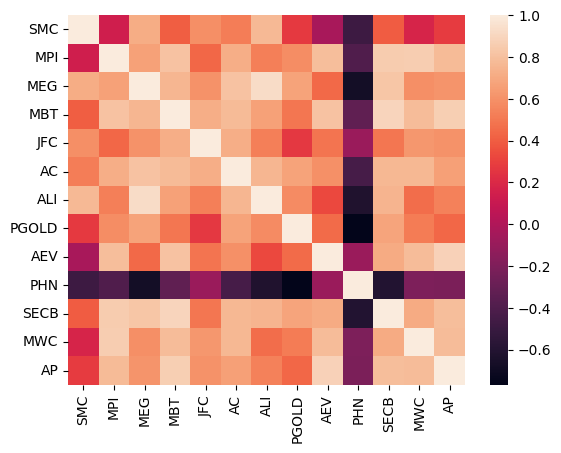

In [9]:
#check for correlation
sns.heatmap(df.corr(), annot=False)

<Axes: >

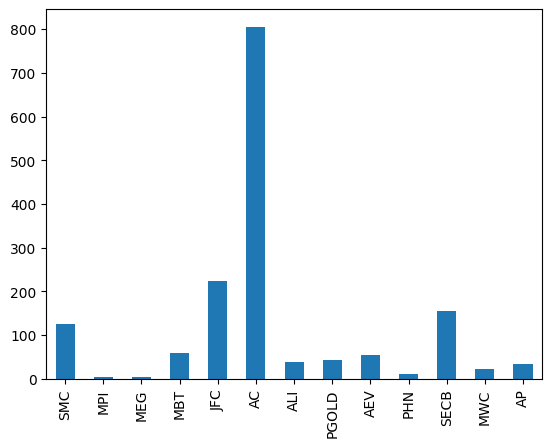

In [8]:
#plot average prices of the stocks
df.mean().plot(kind='bar')

In [10]:
#this will compute log percentage change
daily_pct_change = df.pct_change().apply(lambda x: np.log(1+x))

#this will compute the log of cov matrix
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()

#changed index to datetime index as resample function is only valid with datetime index
df.index=pd.to_datetime(df.index)

#this will compute annual average returns
average_returns = df.resample('Y').last().pct_change().mean()
average_returns

SMC     -0.016026
MPI     -0.110921
MEG     -0.162162
MBT     -0.078921
JFC     -0.006250
AC      -0.063894
ALI     -0.066710
PGOLD   -0.067512
AEV     -0.038170
PHN      0.228759
SECB    -0.163811
MWC      0.047371
AP      -0.027890
dtype: float64

In [11]:
#this will find the annual log covariance
ann_cov = df.pct_change().apply(lambda x: np.log(1+x)).cov()*250

# this will compute the annual standard deviation. I will multiply by 250 because there are apprx. 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))


In [12]:
#create dataframe for returns and volatility
assets = pd.concat([average_returns, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']

In [13]:
# Define an empty array for portfolio returns, portfolio volatility, and asset weights
portfolio_returns = [] 
portfolio_volatility = []  
portfolio_weights = []   

num_assets = len(df.columns)
num_portfolios = 5000

np.random.seed(75)
#-- Loop through and generate lots of random portfolios
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    portfolio_weights.append(weights)
    # Find the product of individual expected returns and its weights for each stock
    returns = np.dot(weights, average_returns) 
    portfolio_returns.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var)
    # Annualize the standard deviation
    ann_sd = sd*np.sqrt(250) 
    portfolio_volatility.append(ann_sd)

In [14]:
#this will create a dictionary of expected returns and volatility
data = {'Returns':portfolio_returns, 'Volatility':portfolio_volatility}

for counter, symbol in enumerate(df.columns.tolist()):
    #this will append the weights of each stock
    data[symbol+' weight'] = [w[counter] for w in portfolio_weights]

# Dataframe of the 5000 portfolios created
portfolios = pd.DataFrame(data)

In [15]:
# use idxmin() to find the minimum value in the column specified. 
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
                              
min_vol_port

Returns         0.008325
Volatility      0.247071
SMC weight      0.210039
MPI weight      0.085139
MEG weight      0.000968
MBT weight      0.004483
JFC weight      0.004337
AC weight       0.006191
ALI weight      0.004237
PGOLD weight    0.174555
AEV weight      0.004393
PHN weight      0.161938
SECB weight     0.016733
MWC weight      0.121161
AP weight       0.205824
Name: 93, dtype: float64

In [16]:
# Finding the optimal risky portfolio
rf = 0.01 # risk_free_rate

#find the portfolio with the highest sharpe ratio using formula and idxmax()
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.024691
Volatility      0.268789
SMC weight      0.053832
MPI weight      0.038099
MEG weight      0.033160
MBT weight      0.086092
JFC weight      0.130758
AC weight       0.045051
ALI weight      0.053977
PGOLD weight    0.030538
AEV weight      0.020976
PHN weight      0.213924
SECB weight     0.004295
MWC weight      0.158719
AP weight       0.130579
Name: 1608, dtype: float64

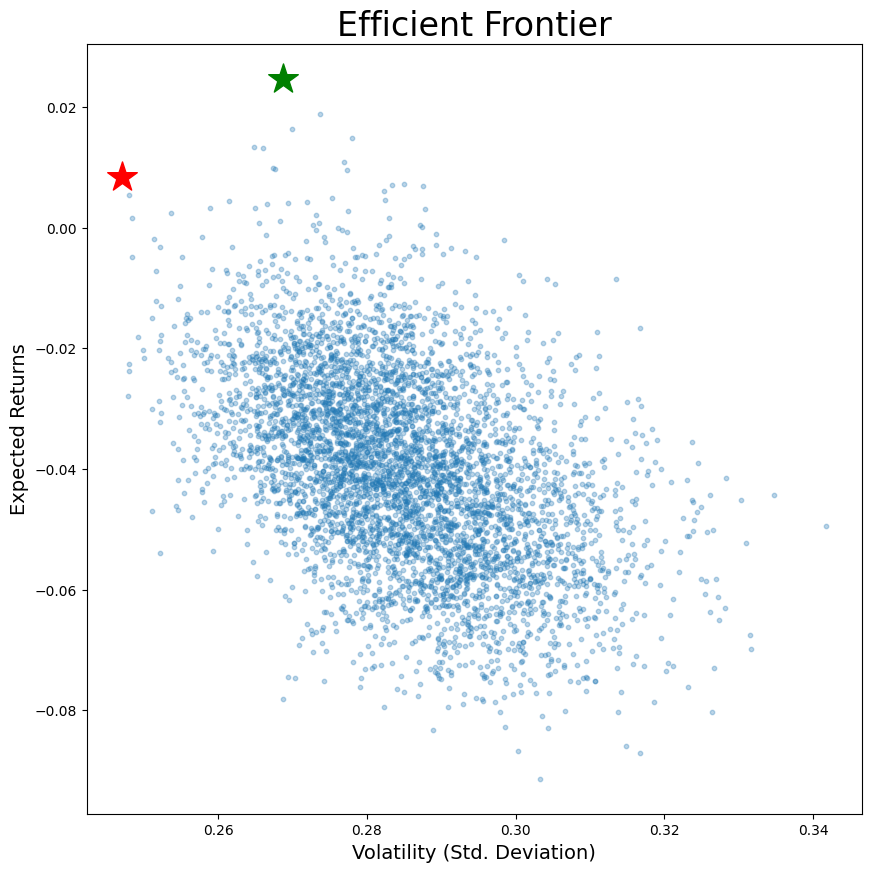

<Figure size 640x480 with 0 Axes>

In [17]:
# This will plot the minimum volatility and optimal risky portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.ylabel('Expected Returns', fontsize=14)
plt.xlabel('Volatility (Std. Deviation)', fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()
plt.clf()

In [22]:
#- Number of assets to include in the portfolio
n_assets = 8

mean_variance_pairs = []
portfolio_weights=[]
tickers_list=[]

for i in tqdm(range(10000)):
    next_i = False
    while True:
        #choose random assets
        assets = np.random.choice(list(daily_pct_change.columns), n_assets, replace=False)
        #- Choose weights randomly ensuring they sum to one
        weights = np.random.rand(n_assets)
        weights = weights/sum(weights)

        #compute portfolio return and variance for each asset pairs
        portfolio_variance = 0
        portfolio_return = 0
        for i in range(len(assets)):
            portfolio_return += weights[i] * average_returns.loc[assets[i]]
            for j in range(len(assets)):
                portfolio_variance += weights[i] * weights[j] * ann_cov.loc[assets[i], assets[j]]

        
        #skip over dominated portfolios
        for R,V in mean_variance_pairs:
            if (R > portfolio_return) & (V < portfolio_variance):
                next_i = True
                break
        if next_i:
            break

        #add the mean-variance pairs to a list for plotting
        mean_variance_pairs.append([portfolio_return, portfolio_variance])
        portfolio_weights.append(weights)
        tickers_list.append(assets)
        break

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1089.36it/s]


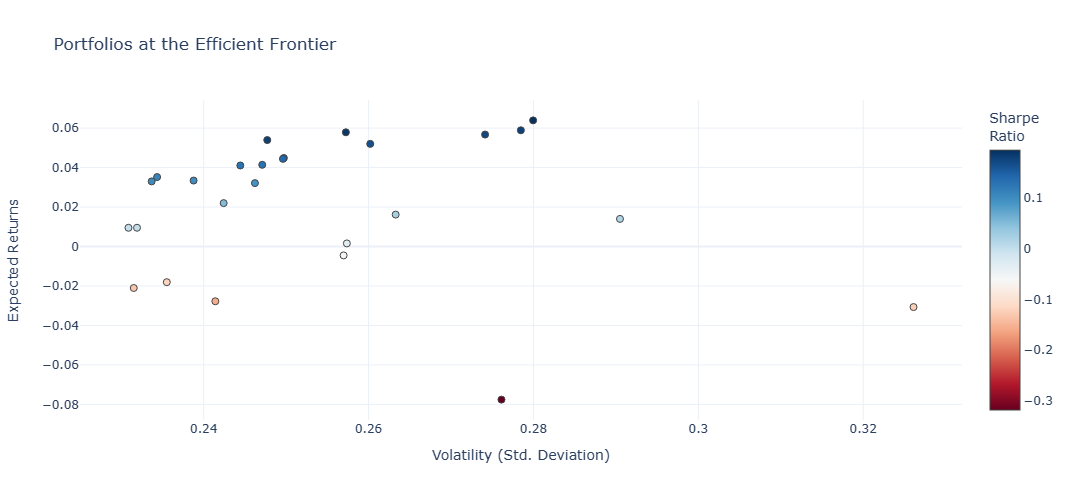

In [23]:
#create an array of the mean-variance pairs
mean_variance_pairs = np.array(mean_variance_pairs)

#sample risk free rate
risk_free_rate=0.01

#plot the efficient frontier
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, y=mean_variance_pairs[:,0], 
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers',
                      text=[str(np.array(tickers_list[i])) + "<br>" + str(np.array(portfolio_weights[i]).round(2)) for i in range(len(tickers_list))]))
fig1.update_layout(template='plotly_white',
                  xaxis=dict(title='Volatility (Std. Deviation)'),
                  yaxis=dict(title='Expected Returns'),
                  title='Portfolios at the Efficient Frontier',
                  width=850,
                  height=500)

pio.show(fig1)